In [1]:
#changing the working directory
%cd /content/gdrive/MyDrive/Skin Disease

/content/gdrive/MyDrive/Skin Disease


In [2]:
# from google.colab import drive

# drive.mount('/content/gdrive')

In [3]:
import os
import keras
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

from keras import layers
from keras import Model

from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import rmsprop_v2
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import GlobalAveragePooling2D

from keras.applications.mobilenet_v2 import MobileNetV2



In [4]:
 # The paths for the training and validation images
train_path = 'base_dir/train_dir'
valid_path = 'base_dir/val_dir'

In [5]:
# Declare a few useful values
num_train_samples = 9013
num_val_samples = 1002
train_batch_size = 50
val_batch_size = 10
image_size = 224

In [6]:
# Declare how many steps are needed in an iteration
train_steps = np.ceil(num_train_samples / train_batch_size)
val_steps = np.ceil(num_val_samples / val_batch_size)

In [7]:
akiec_train_dir = os.path.join(train_path,'akiec')
bcc_train_dir = os.path.join(train_path,'bcc')
bkl_train_dir = os.path.join(train_path,'bkl')
df_train_dir = os.path.join(train_path,'df')
mel_train_dir = os.path.join(train_path,'mel')
nv_train_dir = os.path.join(train_path,'nv')
vasc_train_dir = os.path.join(train_path,'vasc')

In [8]:
akiec_valid_dir = os.path.join(valid_path,'akiec')
bcc_valid_dir = os.path.join(valid_path,'bcc')
bkl_valid_dir = os.path.join(valid_path,'bkl')
df_valid_dir = os.path.join(valid_path,'df')
mel_valid_dir = os.path.join(valid_path,'mel')
nv_valid_dir = os.path.join(valid_path,'nv')
vasc_valid_dir = os.path.join(valid_path,'vasc')

In [9]:
# num_akiec_train_dir = len(os.listdir(akiec_train_dir))
# num_bcc_train_dir = len(os.listdir(bcc_train_dir))
# num_bkl_train_dir = len(os.listdir(bkl_train_dir))
# num_df_train_dir = len(os.listdir(df_train_dir))
# num_mel_train_dir = len(os.listdir(mel_train_dir))
# num_nv_train_dir = len(os.listdir(nv_train_dir))
# num_vasc_train_dir = len(os.listdir(vasc_train_dir))


# print(num_akiec_train_dir)
# print(num_bcc_train_dir)
# print(num_bkl_train_dir)
# print(num_df_train_dir)
# print(num_mel_train_dir)
# print(num_nv_train_dir)
# print(num_vasc_train_dir)

In [10]:
# num_akiec_valid_dir = len(os.listdir(akiec_valid_dir))
# num_bcc_valid_dir = len(os.listdir(bcc_valid_dir))
# num_bkl_valid_dir = len(os.listdir(bkl_valid_dir))
# num_df_valid_dir = len(os.listdir(df_valid_dir))
# num_mel_valid_dir = len(os.listdir(mel_valid_dir))
# num_nv_valid_dir = len(os.listdir(nv_valid_dir))
# num_vasc_valid_dir = len(os.listdir(vasc_valid_dir))


# print(num_akiec_valid_dir)
# print(num_bcc_valid_dir)
# print(num_bkl_valid_dir)
# print(num_df_valid_dir)
# print(num_mel_valid_dir)
# print(num_nv_valid_dir)
# print(num_vasc_valid_dir)

## **Train Test and Validation**

In [11]:
from numpy import False_
train_image_generator = ImageDataGenerator(rescale=1./255,
                                           rotation_range=45,
                                           width_shift_range=.15,
                                           height_shift_range=.15,
                                           zoom_range=0.5,
                                           horizontal_flip=True,
                                           vertical_flip=False_)

print(train_image_generator)

In [12]:
validation_image_generator = ImageDataGenerator(rescale=1./255)

In [13]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=10,
                                                           directory=train_path,
                                                           shuffle=True,
                                                           target_size=(224,224),
                                                           class_mode='categorical',
                                                           color_mode='rgb'
                                                           )

Found 37951 images belonging to 7 classes.


In [14]:
valid_data_gen = train_image_generator.flow_from_directory(batch_size=10,
                                                           directory=valid_path,
                                                           target_size=(224,224),
                                                           class_mode='categorical',
                                                           color_mode='rgb'
                                                           )


Found 1002 images belonging to 7 classes.


In [15]:
def classLabel(source=None):
  datagen = ImageDataGenerator(rescale=1./255)
  data_generator = datagen.flow_from_directory(source)
  class_directory = data_generator.class_indices

  return data_generator, class_directory

labels = classLabel(train_path)

print(labels)

Found 37951 images belonging to 7 classes.
(<keras.preprocessing.image.DirectoryIterator object at 0x7f49ca2fba90>, {'akiec': 0, 'bcc': 1, 'bkl': 2, 'df': 3, 'mel': 4, 'nv': 5, 'vasc': 6})


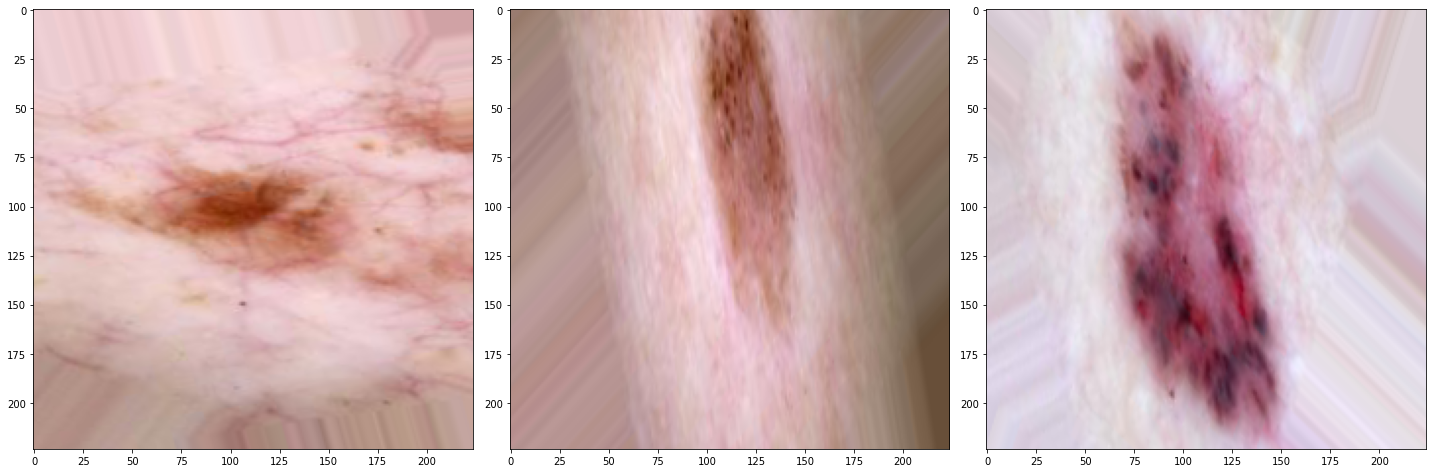

In [16]:
sample_training_images, _ = next(train_data_gen)

def plotImages(images_arr):
  fig, axes = plt.subplots(1,3,figsize=(20,20))
  for img, ax in zip(images_arr, axes):
    ax.imshow(img)
  plt.tight_layout()
  plt.show()

plotImages(sample_training_images[:3])

# **Model Training**

In [17]:
data_augmentation = keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
])

In [18]:
preprocess_input = keras.applications.mobilenet_v2.preprocess_input

In [19]:
base_model = MobileNetV2(input_shape=(224,224,3),
                          include_top = False,
                          weights = 'imagenet')

In [20]:
image_batch, label_batch = next(iter(train_data_gen))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(10, 7, 7, 1280)


In [21]:
base_model.trainable = False

In [22]:
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [23]:
global_average_layer = GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(10, 1280)


In [24]:
prediction_layer = tf.keras.layers.Dense(7)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(10, 7)


In [25]:
inputs = tf.keras.Input(shape=(224,224, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [26]:
base_learning_rate = 0.0001
model.compile(optimizer=keras.optimizers.adam_v2.Adam(learning_rate=base_learning_rate),
              loss=keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [27]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 224, 224, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 224, 224, 3)      0         
 a)                                                              
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                             

In [28]:
len(model.trainable_variables)

2

In [29]:
initial_epochs = 50

# loss0, accuracy0 = model.evaluate(valid_data_gen)

In [30]:
# print("initial loss: {:.2f}".format(loss0))
# print("initial accuracy: {:.2f}".format(accuracy0))

In [ ]:
history = model.fit(train_data_gen,
                    epochs=initial_epochs,
                    steps_per_epoch=10,
                    validation_data=valid_data_gen,
                    verbose=2)

Epoch 1/50
10/10 - 90s - loss: 2.0212 - accuracy: 0.2100 - val_loss: 2.0209 - val_accuracy: 0.0509 - 90s/epoch - 9s/step
Epoch 2/50
10/10 - 47s - loss: 2.2504 - accuracy: 0.0900 - val_loss: 1.9056 - val_accuracy: 0.0509 - 47s/epoch - 5s/step
Epoch 3/50
10/10 - 46s - loss: 2.1153 - accuracy: 0.1400 - val_loss: 1.8738 - val_accuracy: 0.0509 - 46s/epoch - 5s/step
Epoch 4/50
10/10 - 45s - loss: 2.0468 - accuracy: 0.1600 - val_loss: 1.9185 - val_accuracy: 0.0369 - 45s/epoch - 4s/step
Epoch 5/50
10/10 - 47s - loss: 2.0395 - accuracy: 0.1600 - val_loss: 1.9280 - val_accuracy: 0.0329 - 47s/epoch - 5s/step
Epoch 6/50
10/10 - 46s - loss: 2.0094 - accuracy: 0.1100 - val_loss: 1.8388 - val_accuracy: 0.1198 - 46s/epoch - 5s/step
Epoch 7/50
10/10 - 44s - loss: 2.0511 - accuracy: 0.1700 - val_loss: 1.7989 - val_accuracy: 0.1128 - 44s/epoch - 4s/step
Epoch 8/50
10/10 - 46s - loss: 1.9369 - accuracy: 0.1900 - val_loss: 1.7570 - val_accuracy: 0.6697 - 46s/epoch - 5s/step
Epoch 9/50
10/10 - 46s - loss: 1

In [ ]:
from keras.layers.pooling import MaxPooling2D
model = Sequential()
model.add(Conv2D(16,3, padding='same',activation='relu',input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=3))
model.add(Dropout(0.4))
model.add(Conv2D(32,3, padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=3))

model.add(Conv2D(32,3, padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=3))

model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(500, activation='relu'))


model.add(Dropout(0.1))
model.add(Dense(7,activation='softmax'))

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
print(model.summary())

In [ ]:
# history = model.fit_generator(train_data_gen,
#                               validation_data=valid_data_gen,
#                               steps_per_epoch=3,
#                               epochs=100,
#                               validation_steps=3,
#                               verbose=2)